In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pickle

In [2]:
df=pd.read_csv('new_ipl.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df.head()

,Unnamed: 0,match_id,inning,batting_team,bowling_team,delivery,runs,wicket,innings_total,city,venue,last_4overs_wickets,last_4overs_runs
0,0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0.1,0,0,207,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",0,0
1,1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0.2,0,0,207,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",0,0
2,2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0.3,4,0,207,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",0,0
3,3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0.4,0,0,207,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",0,0
4,4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,0.5,2,0,207,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",0,0


In [4]:
df['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [5]:
df['venue'].value_counts()

Eden Gardens                                            17991
Wankhede Stadium                                        17590
M Chinnaswamy Stadium                                   16872
Feroz Shah Kotla                                        15604
Rajiv Gandhi International Stadium, Uppal               13303
MA Chidambaram Stadium, Chepauk                         12006
Sawai Mansingh Stadium                                  11158
Punjab Cricket Association Stadium, Mohali               8266
Maharashtra Cricket Association Stadium                  5055
Subrata Roy Sahara Stadium                               4064
Dr DY Patil Sports Academy                               3993
Kingsmead                                                3643
Punjab Cricket Association IS Bindra Stadium, Mohali     3315
Sardar Patel Stadium, Motera                             2893
SuperSport Park                                          2866
Brabourne Stadium                                        2719
Dr. Y.S.

In [6]:
for i,data in df.iterrows():
    if data['venue']=="Sardar Patel Stadium, Motera":
        df.at[i,'venue']="Narendra Modi Stadium, Motera"
    elif data['venue']=="M. Chinnaswamy Stadium":
        df.at[i,'venue']="M Chinnaswamy Stadium"
    elif data['venue']=="Punjab Cricket Association IS Bindra Stadium, Mohali" or data['venue']=="IS Bindra Stadium, Mohali":
        df.at[i,'venue']="Punjab Cricket Association Stadium, Mohali"
    elif data['venue']=="Feroz Shah Kotla Ground":
        df.at[i,'venue']="Feroz Shah Kotla"
    elif data['venue']=="Rajiv Gandhi Intl. Cricket Stadium":
        df.at[i,'venue']="Rajiv Gandhi International Stadium, Uppal"
    elif data['venue']=="M. A. Chidambaram Stadium":
        df.at[i,'venue']="MA Chidambaram Stadium, Chepauk"
    elif data['venue']=="Maharashtra Cricket Association Stadium":
        df.at[i,'venue']="MCA-Subrata Roy Sahara Stadium"
    elif data['venue']=="Subrata Roy Sahara Stadium":
        df.at[i,'venue']="MCA-Subrata Roy Sahara Stadium"

In [7]:
df['venue'].value_counts()

M Chinnaswamy Stadium                                  18403
Eden Gardens                                           17991
Wankhede Stadium                                       17590
Feroz Shah Kotla                                       17305
Rajiv Gandhi International Stadium, Uppal              15215
MA Chidambaram Stadium, Chepauk                        13895
Punjab Cricket Association Stadium, Mohali             11581
Sawai Mansingh Stadium                                 11158
MCA-Subrata Roy Sahara Stadium                          9119
Dr DY Patil Sports Academy                              3993
Kingsmead                                               3643
Narendra Modi Stadium, Motera                           2893
SuperSport Park                                         2866
Brabourne Stadium                                       2719
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     2546
Saurashtra Cricket Association Stadium                  2381
Himachal Pradesh Cricket

In [8]:
most_common_venue=['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
        'Narendra Modi Stadium, Motera',
        'MCA-Subrata Roy Sahara Stadium']

In [9]:
len(most_common_venue)

11

In [10]:
for i,data in df.iterrows():
    if data['venue'] in most_common_venue:
        df.at[i,'venue']=data['venue']
    else:
        df.at[i,'venue']='Other'

In [11]:
df['venue'].value_counts()

Other                                         39935
M Chinnaswamy Stadium                         18403
Eden Gardens                                  17991
Wankhede Stadium                              17590
Feroz Shah Kotla                              17305
Rajiv Gandhi International Stadium, Uppal     15215
MA Chidambaram Stadium, Chepauk               13895
Punjab Cricket Association Stadium, Mohali    11581
Sawai Mansingh Stadium                        11158
MCA-Subrata Roy Sahara Stadium                 9119
Dr DY Patil Sports Academy                     3993
Narendra Modi Stadium, Motera                  2893
Name: venue, dtype: int64

In [12]:
for i,data in df.iterrows():
    if data['venue']=="Narendra Modi Stadium, Motera":
        df.at[i,'venue']="Narendra Modi Stadium, Motera, Ahmedabad"
    elif data['venue']=="M Chinnaswamy Stadium":
        df.at[i,'venue']="M Chinnaswamy Stadium, Bangalore"
    elif data['venue']=="Dr DY Patil Sports Academy":
        df.at[i,'venue']="Dr DY Patil Sports Academy, Navi Mumbai"
    elif data['venue']=="Feroz Shah Kotla":
        df.at[i,'venue']="Feroz Shah Kotla Stadium, Delhi"
    elif data['venue']=="Rajiv Gandhi International Stadium, Uppal":
        df.at[i,'venue']="Rajiv Gandhi International Stadium, Uppal-Hyderabad"
    elif data['venue']=="MA Chidambaram Stadium, Chepauk":
        df.at[i,'venue']="MA Chidambaram Stadium, Chepauk-Chennai"
    elif data['venue']=="MCA-Subrata Roy Sahara Stadium":
        df.at[i,'venue']="MCA-Subrata Roy Sahara Stadium, Pune"
    elif data['venue']=="Eden Gardens":
        df.at[i,'venue']="Eden Gardens, Kolkata"
    elif data['venue']=="Wankhede Stadium":
        df.at[i,'venue']="Wankhede Stadium, Mumbai"
    elif data['venue']=="Sawai Mansingh Stadium":
        df.at[i,'venue']="Sawai Mansingh Stadium, Jaipur"

In [13]:
df['venue'].value_counts()

Other                                                  39935
M Chinnaswamy Stadium, Bangalore                       18403
Eden Gardens, Kolkata                                  17991
Wankhede Stadium, Mumbai                               17590
Feroz Shah Kotla Stadium, Delhi                        17305
Rajiv Gandhi International Stadium, Uppal-Hyderabad    15215
MA Chidambaram Stadium, Chepauk-Chennai                13895
Punjab Cricket Association Stadium, Mohali             11581
Sawai Mansingh Stadium, Jaipur                         11158
MCA-Subrata Roy Sahara Stadium, Pune                    9119
Dr DY Patil Sports Academy, Navi Mumbai                 3993
Narendra Modi Stadium, Motera, Ahmedabad                2893
Name: venue, dtype: int64

In [14]:
df=df[df['delivery']>=4.0]

In [15]:
df.head()

,Unnamed: 0,match_id,inning,batting_team,bowling_team,delivery,runs,wicket,innings_total,city,venue,last_4overs_wickets,last_4overs_runs
26,26,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4.1,1,0,207,Hyderabad,"Rajiv Gandhi International Stadium, Uppal-Hyde...",1,30
27,27,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4.2,1,0,207,Hyderabad,"Rajiv Gandhi International Stadium, Uppal-Hyde...",1,31
28,28,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4.3,1,0,207,Hyderabad,"Rajiv Gandhi International Stadium, Uppal-Hyde...",1,30
29,29,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4.4,2,0,207,Hyderabad,"Rajiv Gandhi International Stadium, Uppal-Hyde...",1,32
30,30,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,4.5,4,0,207,Hyderabad,"Rajiv Gandhi International Stadium, Uppal-Hyde...",1,35


In [16]:
df=df[['venue','batting_team','bowling_team','delivery','runs','wicket','last_4overs_runs','last_4overs_wickets','innings_total']]

In [17]:
df.head()

,venue,batting_team,bowling_team,delivery,runs,wicket,last_4overs_runs,last_4overs_wickets,innings_total
26,"Rajiv Gandhi International Stadium, Uppal-Hyde...",Sunrisers Hyderabad,Royal Challengers Bangalore,4.1,1,0,30,1,207
27,"Rajiv Gandhi International Stadium, Uppal-Hyde...",Sunrisers Hyderabad,Royal Challengers Bangalore,4.2,1,0,31,1,207
28,"Rajiv Gandhi International Stadium, Uppal-Hyde...",Sunrisers Hyderabad,Royal Challengers Bangalore,4.3,1,0,30,1,207
29,"Rajiv Gandhi International Stadium, Uppal-Hyde...",Sunrisers Hyderabad,Royal Challengers Bangalore,4.4,2,0,32,1,207
30,"Rajiv Gandhi International Stadium, Uppal-Hyde...",Sunrisers Hyderabad,Royal Challengers Bangalore,4.5,4,0,35,1,207


In [18]:
df['batting_team'].value_counts()

Mumbai Indians                 17876
Kings XI Punjab                16518
Royal Challengers Bangalore    16423
Kolkata Knight Riders          16366
Chennai Super Kings            15664
Delhi Daredevils               14753
Rajasthan Royals               13633
Sunrisers Hyderabad            10202
Deccan Chargers                 7147
Pune Warriors                   4322
Gujarat Lions                   2810
Delhi Capitals                  1509
Rising Pune Supergiant          1500
Rising Pune Supergiants         1233
Kochi Tuskers Kerala            1227
Name: batting_team, dtype: int64

In [19]:
for i,data in df.iterrows():
    if data['batting_team']=="Kings XI Punjab":
        df.at[i,'batting_team']="Punjab Kings"
    elif data['batting_team']=="Delhi Daredevils":
        df.at[i,'batting_team']="Delhi Capitals"
    elif data['bowling_team']=="Kings XI Punjab":
        df.at[i,'bowling_team']="Punjab Kings"
    elif data['bowling_team']=="Delhi Daredevils":
        df.at[i,'bowling_team']="Delhi Capitals"

In [20]:
df['batting_team'].value_counts()

Mumbai Indians                 17876
Punjab Kings                   16518
Royal Challengers Bangalore    16423
Kolkata Knight Riders          16366
Delhi Capitals                 16262
Chennai Super Kings            15664
Rajasthan Royals               13633
Sunrisers Hyderabad            10202
Deccan Chargers                 7147
Pune Warriors                   4322
Gujarat Lions                   2810
Rising Pune Supergiant          1500
Rising Pune Supergiants         1233
Kochi Tuskers Kerala            1227
Name: batting_team, dtype: int64

In [21]:
current_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians', 'Punjab Kings',
               'Royal Challengers Bangalore', 'Delhi Capitals','Sunrisers Hyderabad']

In [22]:
df=df[(df['batting_team'].isin(current_teams)) & (df['bowling_team'].isin(current_teams))]

In [23]:
df.head()

,venue,batting_team,bowling_team,delivery,runs,wicket,last_4overs_runs,last_4overs_wickets,innings_total
26,"Rajiv Gandhi International Stadium, Uppal-Hyde...",Sunrisers Hyderabad,Royal Challengers Bangalore,4.1,1,0,30,1,207
27,"Rajiv Gandhi International Stadium, Uppal-Hyde...",Sunrisers Hyderabad,Royal Challengers Bangalore,4.2,1,0,31,1,207
28,"Rajiv Gandhi International Stadium, Uppal-Hyde...",Sunrisers Hyderabad,Royal Challengers Bangalore,4.3,1,0,30,1,207
29,"Rajiv Gandhi International Stadium, Uppal-Hyde...",Sunrisers Hyderabad,Royal Challengers Bangalore,4.4,2,0,32,1,207
30,"Rajiv Gandhi International Stadium, Uppal-Hyde...",Sunrisers Hyderabad,Royal Challengers Bangalore,4.5,4,0,35,1,207


In [24]:
df.shape

(102733, 9)

In [25]:
encoded_df=pd.get_dummies(df,columns=['venue','batting_team','bowling_team'])

In [26]:
encoded_df.columns

Index(['delivery', 'runs', 'wicket', 'last_4overs_runs', 'last_4overs_wickets',
       'innings_total', 'venue_Dr DY Patil Sports Academy, Navi Mumbai',
       'venue_Eden Gardens, Kolkata', 'venue_Feroz Shah Kotla Stadium, Delhi',
       'venue_M Chinnaswamy Stadium, Bangalore',
       'venue_MA Chidambaram Stadium, Chepauk-Chennai',
       'venue_MCA-Subrata Roy Sahara Stadium, Pune',
       'venue_Narendra Modi Stadium, Motera, Ahmedabad', 'venue_Other',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal-Hyderabad',
       'venue_Sawai Mansingh Stadium, Jaipur',
       'venue_Wankhede Stadium, Mumbai', 'batting_team_Chennai Super Kings',
       'batting_team_Delhi Capitals', 'batting_team_Kolkata Knight Riders',
       'batting_team_Mumbai Indians', 'batting_team_Punjab Kings',
       'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_t

In [27]:
X = encoded_df.drop('innings_total',axis=1)
y = encoded_df['innings_total']

In [28]:
X.head()

,delivery,runs,wicket,last_4overs_runs,last_4overs_wickets,"venue_Dr DY Patil Sports Academy, Navi Mumbai","venue_Eden Gardens, Kolkata","venue_Feroz Shah Kotla Stadium, Delhi","venue_M Chinnaswamy Stadium, Bangalore","venue_MA Chidambaram Stadium, Chepauk-Chennai","venue_MCA-Subrata Roy Sahara Stadium, Pune","venue_Narendra Modi Stadium, Motera, Ahmedabad",venue_Other,"venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal-Hyderabad","venue_Sawai Mansingh Stadium, Jaipur","venue_Wankhede Stadium, Mumbai",batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Punjab Kings,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Capitals,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Punjab Kings,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
26,4.1,1,0,30,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
27,4.2,1,0,31,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
28,4.3,1,0,30,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
29,4.4,2,0,32,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
30,4.5,4,0,35,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [29]:
X.shape

(102733, 33)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

In [32]:
ridge=Ridge()
parameters={'alpha':[10,20,30,40,50]}
ridge_regressor=RandomizedSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\lsani\anaconda3\envs\iplscore\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': [10, 20, 30, 40, 50]},
                   scoring='neg_mean_squared_error')

In [33]:
ridge_regressor.best_params_

{'alpha': 40}

In [34]:
ridge_regressor.best_score_

-649.7336122666044

In [35]:
prediction = ridge_regressor.predict(X_test)

C:\Users\lsani\anaconda3\envs\iplscore\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='innings_total', ylabel='Density'>

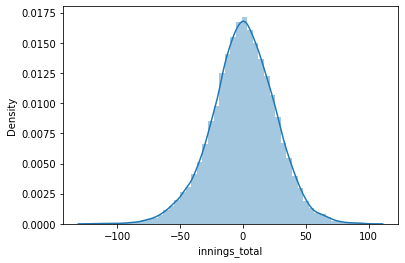

In [36]:
sns.distplot(y_test-prediction)

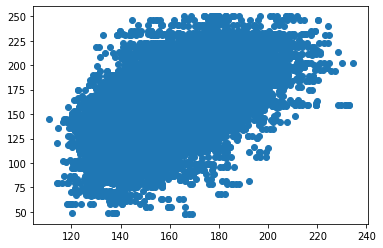

In [37]:
plt.scatter(prediction,y_test)

In [38]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R SQUARED : ',round(metrics.r2_score(y_test,prediction),2))

MAE :  19.968850904691543
MSE :  656.6231828980059
RMSE :  25.624659664042486
R SQUARED :  0.28


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

C:\Users\lsani\anaconda3\envs\iplscore\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


MAE :  19.969715125834608
MSE :  656.6408068709093
RMSE :  25.625003548700423
R SQUARED :  0.28


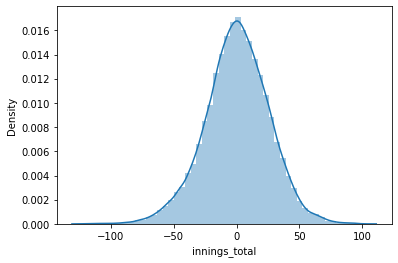

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
sns.distplot(y_test-prediction)
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R SQUARED : ',round(metrics.r2_score(y_test,prediction),2))

In [41]:
pickle.dump(ridge_regressor, open('ipl_model.pkl','wb'))

In [47]:
p = np.array([16,160,2,56,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0])
ridge_regressor.predict([p])

array([196.23832323])